
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
STARTING EXPENSE TREND ANALYSIS
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
MONTHLY EXPENSE TREND ANALYSIS

📊 MONTHLY TRENDS SUMMARY:
   Total months analyzed: 24
   Average monthly spend: ₹24,203,643.25
   Highest spending month: 2024-11
   Lowest spending month: 2024-06

⚠️  VOLATILE MONTHS (>20% change):
   invoice_month  total_spend  mom_growth_pct
1        2024-03  27529087.63           47.36
4        2024-06   8700181.33          -53.43
5        2024-07  14532405.33           67.04
7        2024-09  29795517.28          109.14
8        2024-10  37320561.84           25.26
9        2024-11  52779251.09           41.42
10       2024-12  19624128.39          -62.82
12       2025-02  27886025.77           64.95
15       2025-05  10598106.90          -60.27
16       2025-06  21754979.14          105.27
20       2025-10  33221564.12           86.92
22       2025-12  39713352.14           37.12
23       2026-01  14523109.32          -63.43

EXPENSE

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/expense_trends_dashboard.png'

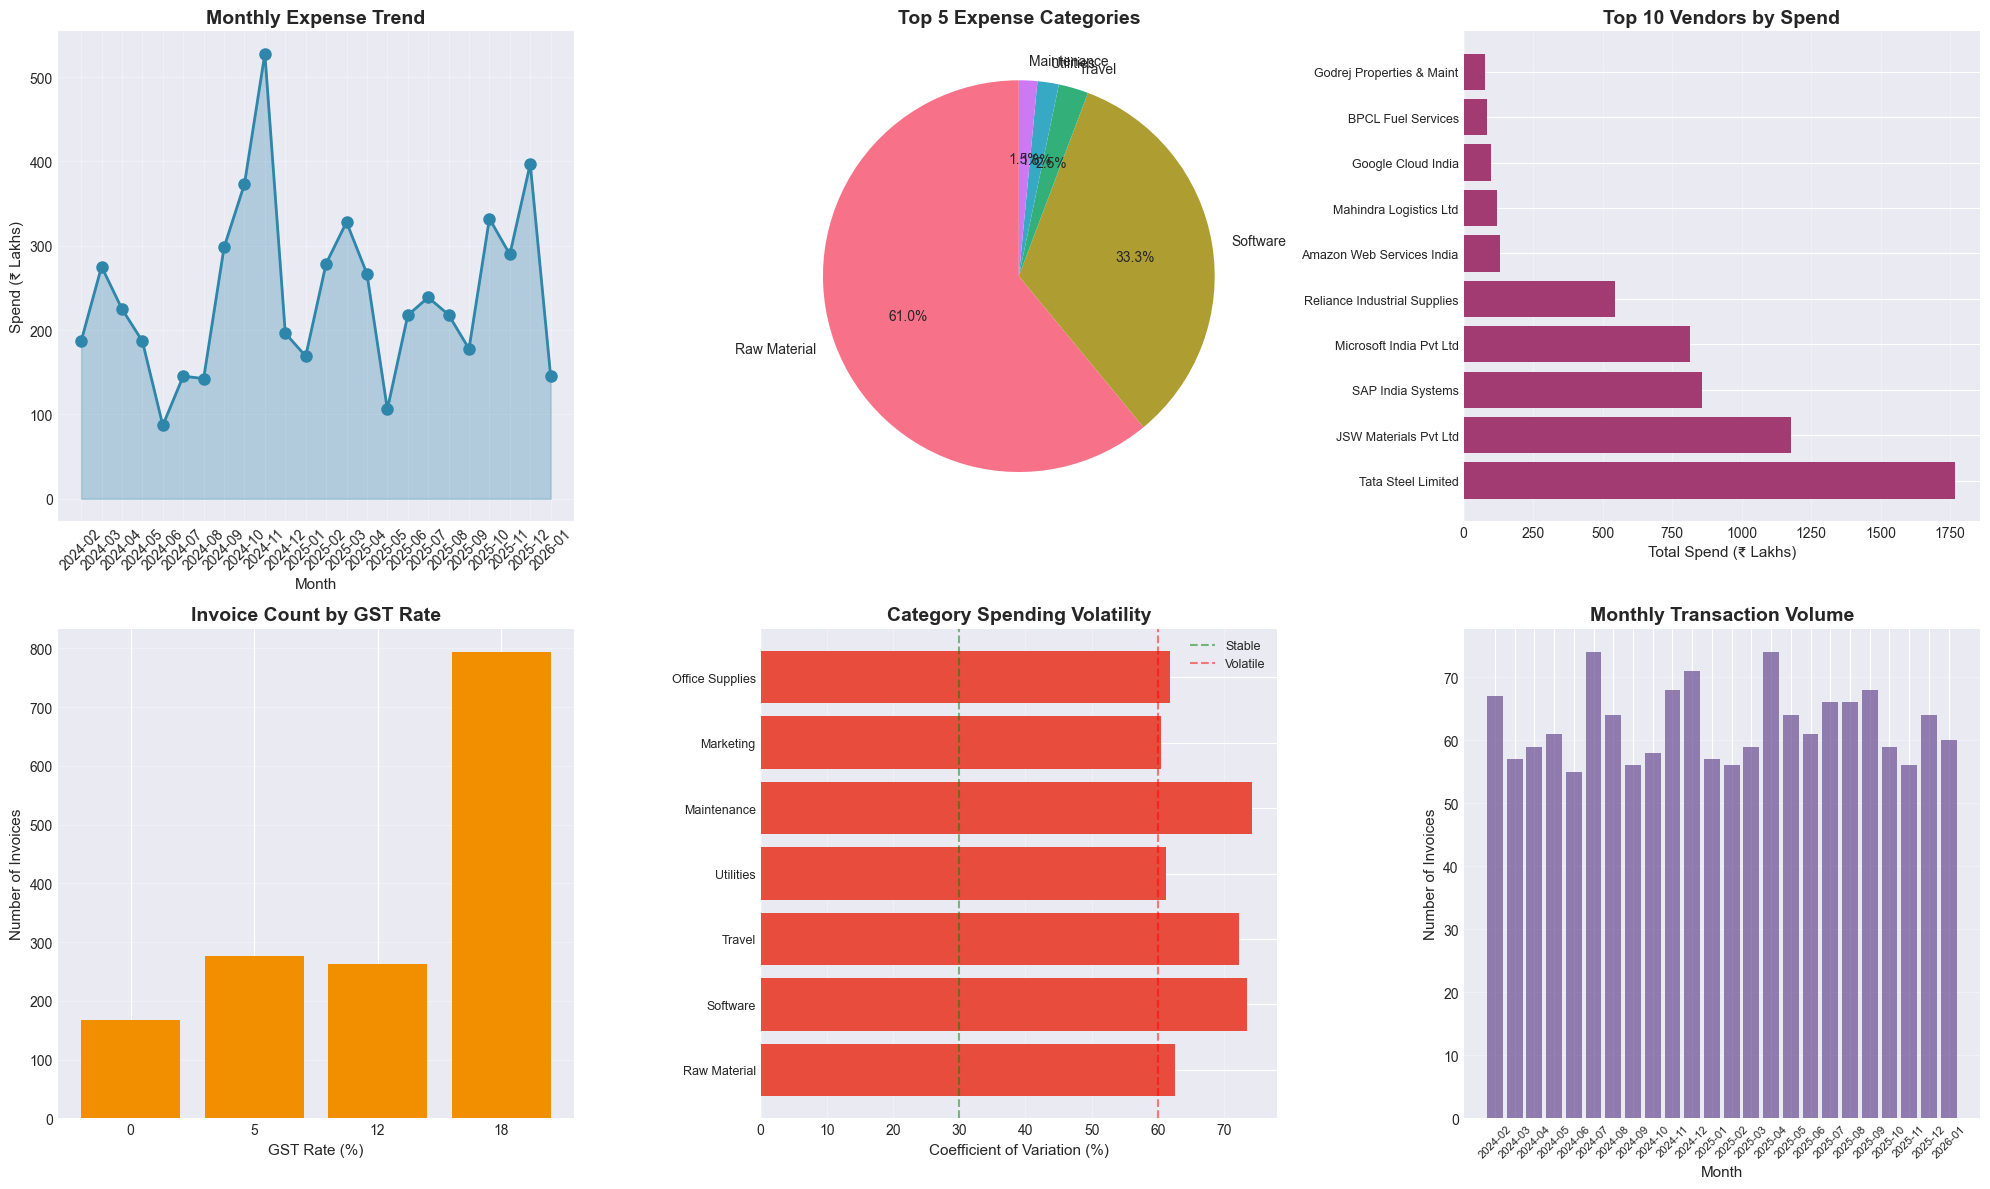

In [4]:
"""
EXPENSE TREND ANALYSIS MODULE
AINextBill Technology - Purchase Invoice Analysis

This module performs comprehensive time-series analysis of expenses,
category-wise trends, and generates CFO-ready insights.

Author: Data Science Intern
Date: February 2026
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


class ExpenseTrendAnalyzer:
    """
    Analyze expense trends over time with a product-focused,
    accounting-aware approach.
    """
    
    def __init__(self, df):
        """
        Initialize the trend analyzer.
        
        Args:
            df (pd.DataFrame): Cleaned invoice dataframe
        """
        self.df = df.copy()
        self.monthly_trends = None
        self.category_analysis = None
        self.vendor_analysis = None
        
    
    def analyze_monthly_trends(self):
        """
        Analyze total expenses over time with key metrics.
        
        METRICS CALCULATED:
        - Total monthly spend (GST-exclusive)
        - Transaction count
        - Average invoice value
        - Month-over-month growth rate
        - GST liability per month
        
        Returns:
            pd.DataFrame: Monthly aggregated metrics
        """
        print("=" * 80)
        print("MONTHLY EXPENSE TREND ANALYSIS")
        print("=" * 80)
        
        # Group by month and calculate key metrics
        self.monthly_trends = self.df.groupby('invoice_month').agg({
            'invoice_amount': ['sum', 'mean', 'std'],
            'gst_amount': 'sum',
            'total_amount': 'sum',
            'invoice_id': 'count',
            'vendor_name': 'nunique',
            'expense_category': 'nunique'
        }).round(2)
        
        # Flatten column names
        self.monthly_trends.columns = [
            'total_spend', 'avg_invoice', 'spend_volatility',
            'total_gst', 'total_payable', 'invoice_count', 
            'unique_vendors', 'unique_categories'
        ]
        
        # Calculate month-over-month growth
        self.monthly_trends['mom_growth_pct'] = (
            self.monthly_trends['total_spend'].pct_change() * 100
        ).round(2)
        
        # Calculate average invoice value
        self.monthly_trends['avg_invoice_value'] = (
            self.monthly_trends['total_spend'] / self.monthly_trends['invoice_count']
        ).round(2)
        
        # Reset index for easier plotting
        self.monthly_trends = self.monthly_trends.reset_index()
        self.monthly_trends['invoice_month'] = self.monthly_trends['invoice_month'].astype(str)
        
        # Print summary
        print(f"\n📊 MONTHLY TRENDS SUMMARY:")
        print(f"   Total months analyzed: {len(self.monthly_trends)}")
        print(f"   Average monthly spend: ₹{self.monthly_trends['total_spend'].mean():,.2f}")
        print(f"   Highest spending month: {self.monthly_trends.loc[self.monthly_trends['total_spend'].idxmax(), 'invoice_month']}")
        print(f"   Lowest spending month: {self.monthly_trends.loc[self.monthly_trends['total_spend'].idxmin(), 'invoice_month']}")
        
        # Identify volatile months (>20% change)
        volatile_months = self.monthly_trends[
            self.monthly_trends['mom_growth_pct'].abs() > 20
        ]
        if len(volatile_months) > 0:
            print(f"\n⚠️  VOLATILE MONTHS (>20% change):")
            print(volatile_months[['invoice_month', 'total_spend', 'mom_growth_pct']])
        
        return self.monthly_trends
    
    
    def analyze_expense_categories(self):
        """
        Deep dive into expense categories:
        - Total spend by category
        - Stability vs volatility
        - Planned vs irregular spending patterns
        
        Returns:
            pd.DataFrame: Category-wise analysis
        """
        print("\n" + "=" * 80)
        print("EXPENSE CATEGORY ANALYSIS")
        print("=" * 80)
        
        # Aggregate by category
        self.category_analysis = self.df.groupby('expense_category').agg({
            'invoice_amount': ['sum', 'mean', 'std', 'count', 'min', 'max'],
            'gst_amount': 'sum',
            'vendor_name': 'nunique'
        }).round(2)
        
        # Flatten columns
        self.category_analysis.columns = [
            'total_spend', 'avg_invoice', 'std_dev', 'invoice_count',
            'min_invoice', 'max_invoice', 'total_gst', 'unique_vendors'
        ]
        
        # Calculate coefficient of variation (volatility metric)
        self.category_analysis['coefficient_of_variation'] = (
            self.category_analysis['std_dev'] / self.category_analysis['avg_invoice'] * 100
        ).round(2)
        
        # Classify stability
        def classify_volatility(cv):
            if cv < 30:
                return 'Stable'
            elif cv < 60:
                return 'Moderate'
            else:
                return 'Volatile'
        
        self.category_analysis['volatility_type'] = \
            self.category_analysis['coefficient_of_variation'].apply(classify_volatility)
        
        # Calculate percentage of total spend
        total_spend = self.category_analysis['total_spend'].sum()
        self.category_analysis['pct_of_total'] = (
            self.category_analysis['total_spend'] / total_spend * 100
        ).round(2)
        
        # Sort by total spend
        self.category_analysis = self.category_analysis.sort_values(
            'total_spend', ascending=False
        )
        
        # Print results
        print("\n📊 TOP EXPENSE CATEGORIES:")
        print(self.category_analysis[['total_spend', 'invoice_count', 'pct_of_total', 
                                       'volatility_type']].head(10))
        
        # Category insights
        print("\n" + "=" * 80)
        print("CATEGORY INSIGHTS")
        print("=" * 80)
        
        stable_categories = self.category_analysis[
            self.category_analysis['volatility_type'] == 'Stable'
        ]
        volatile_categories = self.category_analysis[
            self.category_analysis['volatility_type'] == 'Volatile'
        ]
        
        print(f"\n✅ STABLE CATEGORIES ({len(stable_categories)}):")
        print("   (Predictable, likely recurring subscriptions/contracts)")
        for cat in stable_categories.index:
            spend = stable_categories.loc[cat, 'total_spend']
            cv = stable_categories.loc[cat, 'coefficient_of_variation']
            print(f"   • {cat}: ₹{spend:,.2f} (CV: {cv:.1f}%)")
        
        print(f"\n⚠️  VOLATILE CATEGORIES ({len(volatile_categories)}):")
        print("   (Irregular, project-based, or commodity-driven)")
        for cat in volatile_categories.index:
            spend = volatile_categories.loc[cat, 'total_spend']
            cv = volatile_categories.loc[cat, 'coefficient_of_variation']
            print(f"   • {cat}: ₹{spend:,.2f} (CV: {cv:.1f}%)")
        
        return self.category_analysis
    
    
    def analyze_vendor_patterns(self):
        """
        Analyze vendor spending patterns and classify vendors.
        
        VENDOR CLASSIFICATION:
        - Recurring: Present in >75% of months
        - Regular: Present in 40-75% of months
        - Occasional: Present in <40% of months
        
        Returns:
            pd.DataFrame: Vendor-wise analysis
        """
        print("\n" + "=" * 80)
        print("VENDOR PATTERN ANALYSIS")
        print("=" * 80)
        
        # Calculate total months in dataset
        total_months = self.df['invoice_month'].nunique()
        
        # Aggregate by vendor
        self.vendor_analysis = self.df.groupby('vendor_name').agg({
            'invoice_amount': ['sum', 'mean', 'count'],
            'invoice_month': 'nunique',
            'gst_amount': 'sum',
            'payment_mode': lambda x: (x == 'Credit').sum() / len(x) * 100
        }).round(2)
        
        # Flatten columns
        self.vendor_analysis.columns = [
            'total_spend', 'avg_invoice', 'invoice_count',
            'months_active', 'total_gst', 'credit_payment_pct'
        ]
        
        # Calculate metrics
        self.vendor_analysis['monthly_avg_spend'] = (
            self.vendor_analysis['total_spend'] / self.vendor_analysis['months_active']
        ).round(2)
        
        self.vendor_analysis['months_active_pct'] = (
            self.vendor_analysis['months_active'] / total_months * 100
        ).round(2)
        
        # Classify vendors
        def classify_vendor(pct):
            if pct > 75:
                return 'Recurring'
            elif pct > 40:
                return 'Regular'
            else:
                return 'Occasional'
        
        self.vendor_analysis['vendor_type'] = \
            self.vendor_analysis['months_active_pct'].apply(classify_vendor)
        
        # Sort by total spend
        self.vendor_analysis = self.vendor_analysis.sort_values(
            'total_spend', ascending=False
        )
        
        # Print summary
        print(f"\n📊 TOP 10 VENDORS BY SPEND:")
        print(self.vendor_analysis[['total_spend', 'invoice_count', 'months_active', 
                                      'vendor_type']].head(10))
        
        # Vendor type distribution
        print("\n" + "=" * 80)
        print("VENDOR CLASSIFICATION")
        print("=" * 80)
        
        vendor_types = self.vendor_analysis['vendor_type'].value_counts()
        for vtype in ['Recurring', 'Regular', 'Occasional']:
            if vtype in vendor_types.index:
                count = vendor_types[vtype]
                vendors = self.vendor_analysis[self.vendor_analysis['vendor_type'] == vtype]
                total_spend = vendors['total_spend'].sum()
                print(f"\n{vtype} Vendors ({count}):")
                print(f"   Total spend: ₹{total_spend:,.2f}")
                print(f"   Top vendors: {', '.join(vendors.head(3).index)}")
        
        return self.vendor_analysis
    
    
    def identify_spending_anomalies(self):
        """
        Identify months with abnormal spending patterns.
        
        ANOMALY DETECTION:
        - Months where spend > 1.5x average
        - Months where spend < 0.5x average
        - Single vendor driving spike
        
        Returns:
            dict: Anomaly insights
        """
        print("\n" + "=" * 80)
        print("SPENDING ANOMALY DETECTION")
        print("=" * 80)
        
        anomalies = {}
        
        # Calculate thresholds
        avg_monthly_spend = self.monthly_trends['total_spend'].mean()
        upper_threshold = avg_monthly_spend * 1.5
        lower_threshold = avg_monthly_spend * 0.5
        
        # Find high-spend months
        high_months = self.monthly_trends[
            self.monthly_trends['total_spend'] > upper_threshold
        ]
        
        # Find low-spend months
        low_months = self.monthly_trends[
            self.monthly_trends['total_spend'] < lower_threshold
        ]
        
        print(f"\n📊 SPENDING BASELINE:")
        print(f"   Average monthly spend: ₹{avg_monthly_spend:,.2f}")
        print(f"   Upper threshold (1.5x): ₹{upper_threshold:,.2f}")
        print(f"   Lower threshold (0.5x): ₹{lower_threshold:,.2f}")
        
        if len(high_months) > 0:
            print(f"\n⚠️  HIGH SPENDING MONTHS ({len(high_months)}):")
            for _, month in high_months.iterrows():
                print(f"   • {month['invoice_month']}: ₹{month['total_spend']:,.2f} "
                      f"({month['mom_growth_pct']:+.1f}% MoM)")
                
                # Find top vendor in that month
                month_data = self.df[self.df['invoice_month'] == month['invoice_month']]
                top_vendor = month_data.groupby('vendor_name')['invoice_amount'].sum().idxmax()
                top_vendor_spend = month_data.groupby('vendor_name')['invoice_amount'].sum().max()
                
                print(f"      → Top vendor: {top_vendor} (₹{top_vendor_spend:,.2f})")
            
            anomalies['high_months'] = high_months
        
        if len(low_months) > 0:
            print(f"\n📉 LOW SPENDING MONTHS ({len(low_months)}):")
            for _, month in low_months.iterrows():
                print(f"   • {month['invoice_month']}: ₹{month['total_spend']:,.2f} "
                      f"({month['mom_growth_pct']:+.1f}% MoM)")
            
            anomalies['low_months'] = low_months
        
        return anomalies
    
    
    def analyze_gst_patterns(self):
        """
        Analyze GST distribution and identify compliance insights.
        
        KEY INSIGHTS:
        - 0% GST transactions (RCM candidates)
        - GST rate distribution
        - GST-heavy vs GST-light categories
        
        Returns:
            dict: GST insights
        """
        print("\n" + "=" * 80)
        print("GST PATTERN ANALYSIS")
        print("=" * 80)
        
        gst_insights = {}
        
        # GST rate distribution
        gst_distribution = self.df.groupby('gst_rate').agg({
            'invoice_id': 'count',
            'invoice_amount': 'sum',
            'gst_amount': 'sum'
        })
        gst_distribution.columns = ['invoice_count', 'total_base_amount', 'total_gst']
        
        print("\n📊 GST RATE DISTRIBUTION:")
        print(gst_distribution)
        
        # Analyze 0% GST transactions
        zero_gst = self.df[self.df['gst_rate'] == 0]
        
        if len(zero_gst) > 0:
            print(f"\n⚠️  ZERO-GST TRANSACTIONS ({len(zero_gst)} invoices):")
            print(f"   Total value: ₹{zero_gst['invoice_amount'].sum():,.2f}")
            
            # Top categories with 0% GST
            zero_gst_categories = zero_gst.groupby('expense_category')['invoice_amount'].agg(['sum', 'count'])
            zero_gst_categories = zero_gst_categories.sort_values('sum', ascending=False)
            
            print("\n   Top categories:")
            for cat, row in zero_gst_categories.head(5).iterrows():
                print(f"   • {cat}: ₹{row['sum']:,.2f} ({row['count']} invoices)")
            
            # Top vendors with 0% GST
            zero_gst_vendors = zero_gst.groupby('vendor_name')['invoice_amount'].agg(['sum', 'count'])
            zero_gst_vendors = zero_gst_vendors.sort_values('sum', ascending=False)
            
            print("\n   Top vendors:")
            for vendor, row in zero_gst_vendors.head(5).iterrows():
                print(f"   • {vendor}: ₹{row['sum']:,.2f} ({row['count']} invoices)")
            
            print("\n   💡 COMPLIANCE INSIGHT:")
            print("   These 0% GST transactions may require:")
            print("   - Reverse Charge Mechanism (RCM) assessment")
            print("   - Export of services verification")
            print("   - Exempted category confirmation")
            
            gst_insights['zero_gst_transactions'] = zero_gst
        
        # Category-wise GST burden
        category_gst = self.df.groupby('expense_category').agg({
            'invoice_amount': 'sum',
            'gst_amount': 'sum'
        })
        category_gst['gst_burden_pct'] = (
            category_gst['gst_amount'] / category_gst['invoice_amount'] * 100
        ).round(2)
        category_gst = category_gst.sort_values('gst_burden_pct', ascending=False)
        
        print(f"\n📊 GST BURDEN BY CATEGORY:")
        print(category_gst[['gst_burden_pct']])
        
        gst_insights['gst_distribution'] = gst_distribution
        gst_insights['category_gst_burden'] = category_gst
        
        return gst_insights
    
    
    def visualize_trends(self, save_path=None):
        """
        Create comprehensive visualizations for CFO dashboard.
        
        CHARTS CREATED:
        1. Monthly spending trend
        2. Category-wise breakdown
        3. Top vendors
        4. GST distribution
        
        Args:
            save_path (str, optional): Directory to save plots
        """
        print("\n" + "=" * 80)
        print("GENERATING VISUALIZATIONS")
        print("=" * 80)
        
        # Create figure with subplots
        fig = plt.figure(figsize=(20, 12))
        
        # 1. Monthly Spending Trend
        ax1 = plt.subplot(2, 3, 1)
        months = self.monthly_trends['invoice_month'].values
        spend = self.monthly_trends['total_spend'].values / 100000  # In lakhs
        
        ax1.plot(months, spend, marker='o', linewidth=2, markersize=8, color='#2E86AB')
        ax1.fill_between(range(len(months)), spend, alpha=0.3, color='#2E86AB')
        ax1.set_title('Monthly Expense Trend', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Month', fontsize=11)
        ax1.set_ylabel('Spend (₹ Lakhs)', fontsize=11)
        ax1.grid(True, alpha=0.3)
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Category Breakdown (Pie Chart)
        ax2 = plt.subplot(2, 3, 2)
        top_categories = self.category_analysis.head(5)
        colors = sns.color_palette("husl", len(top_categories))
        
        ax2.pie(top_categories['total_spend'], 
                labels=top_categories.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=colors,
                textprops={'fontsize': 10})
        ax2.set_title('Top 5 Expense Categories', fontsize=14, fontweight='bold')
        
        # 3. Top Vendors Bar Chart
        ax3 = plt.subplot(2, 3, 3)
        top_vendors = self.vendor_analysis.head(10)
        vendor_spend = top_vendors['total_spend'].values / 100000  # In lakhs
        
        ax3.barh(range(len(top_vendors)), vendor_spend, color='#A23B72')
        ax3.set_yticks(range(len(top_vendors)))
        ax3.set_yticklabels(top_vendors.index, fontsize=9)
        ax3.set_xlabel('Total Spend (₹ Lakhs)', fontsize=11)
        ax3.set_title('Top 10 Vendors by Spend', fontsize=14, fontweight='bold')
        ax3.grid(axis='x', alpha=0.3)
        
        # 4. GST Rate Distribution
        ax4 = plt.subplot(2, 3, 4)
        gst_rates = self.df.groupby('gst_rate')['invoice_id'].count()
        
        ax4.bar(gst_rates.index.astype(str), gst_rates.values, color='#F18F01')
        ax4.set_title('Invoice Count by GST Rate', fontsize=14, fontweight='bold')
        ax4.set_xlabel('GST Rate (%)', fontsize=11)
        ax4.set_ylabel('Number of Invoices', fontsize=11)
        ax4.grid(axis='y', alpha=0.3)
        
        # 5. Category Volatility
        ax5 = plt.subplot(2, 3, 5)
        category_cv = self.category_analysis.head(8)['coefficient_of_variation']
        
        colors_volatility = ['#27AE60' if x < 30 else '#F39C12' if x < 60 else '#E74C3C' 
                             for x in category_cv.values]
        
        ax5.barh(range(len(category_cv)), category_cv.values, color=colors_volatility)
        ax5.set_yticks(range(len(category_cv)))
        ax5.set_yticklabels(category_cv.index, fontsize=9)
        ax5.set_xlabel('Coefficient of Variation (%)', fontsize=11)
        ax5.set_title('Category Spending Volatility', fontsize=14, fontweight='bold')
        ax5.axvline(x=30, color='green', linestyle='--', alpha=0.5, label='Stable')
        ax5.axvline(x=60, color='red', linestyle='--', alpha=0.5, label='Volatile')
        ax5.legend(fontsize=9)
        ax5.grid(axis='x', alpha=0.3)
        
        # 6. Monthly Transaction Count
        ax6 = plt.subplot(2, 3, 6)
        transaction_count = self.monthly_trends['invoice_count'].values
        
        ax6.bar(range(len(months)), transaction_count, color='#6A4C93', alpha=0.7)
        ax6.set_xticks(range(len(months)))
        ax6.set_xticklabels(months, rotation=45, fontsize=8)
        ax6.set_title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
        ax6.set_xlabel('Month', fontsize=11)
        ax6.set_ylabel('Number of Invoices', fontsize=11)
        ax6.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(f"{save_path}/expense_trends_dashboard.png", dpi=300, bbox_inches='tight')
            print(f"✅ Saved visualization to: {save_path}/expense_trends_dashboard.png")
        
        plt.show()
        
        print("✅ Visualizations generated successfully")
    
    
    def generate_insights_report(self):
        """
        Generate a concise, CFO-ready insights summary.
        
        Returns:
            dict: Key insights and recommendations
        """
        print("\n" + "=" * 80)
        print("KEY INSIGHTS & RECOMMENDATIONS")
        print("=" * 80)
        
        insights = {}
        
        # Insight 1: Top spending category
        top_category = self.category_analysis.index[0]
        top_category_spend = self.category_analysis.iloc[0]['total_spend']
        top_category_pct = self.category_analysis.iloc[0]['pct_of_total']
        
        print(f"\n1️⃣  DOMINANT EXPENSE CATEGORY:")
        print(f"   {top_category} accounts for {top_category_pct:.1f}% of total spend (₹{top_category_spend:,.2f})")
        
        insights['top_category'] = {
            'name': top_category,
            'spend': top_category_spend,
            'percentage': top_category_pct
        }
        
        # Insight 2: Vendor concentration
        top_3_vendors_spend = self.vendor_analysis.head(3)['total_spend'].sum()
        total_spend = self.vendor_analysis['total_spend'].sum()
        concentration_pct = (top_3_vendors_spend / total_spend * 100)
        
        print(f"\n2️⃣  VENDOR CONCENTRATION RISK:")
        print(f"   Top 3 vendors account for {concentration_pct:.1f}% of total spend")
        if concentration_pct > 50:
            print(f"   ⚠️  HIGH CONCENTRATION - Consider diversifying vendor base")
        
        insights['vendor_concentration'] = concentration_pct
        
        # Insight 3: Monthly volatility
        avg_mom_change = self.monthly_trends['mom_growth_pct'].abs().mean()
        print(f"\n3️⃣  SPENDING VOLATILITY:")
        print(f"   Average month-over-month change: {avg_mom_change:.1f}%")
        if avg_mom_change > 15:
            print(f"   ⚠️  HIGH VOLATILITY - Implement better forecasting")
        
        insights['monthly_volatility'] = avg_mom_change
        
        # Insight 4: Zero GST analysis
        zero_gst_count = len(self.df[self.df['gst_rate'] == 0])
        zero_gst_value = self.df[self.df['gst_rate'] == 0]['invoice_amount'].sum()
        
        print(f"\n4️⃣  GST COMPLIANCE OPPORTUNITY:")
        print(f"   {zero_gst_count} invoices ({zero_gst_count/len(self.df)*100:.1f}%) with 0% GST")
        print(f"   Total value: ₹{zero_gst_value:,.2f}")
        print(f"   💡 Review for RCM applicability and export services verification")
        
        insights['zero_gst'] = {
            'count': zero_gst_count,
            'value': zero_gst_value
        }
        
        return insights
    
    
    def run_full_analysis(self, save_visualizations=True, output_path=None):
        """
        Execute complete expense trend analysis pipeline.
        
        Args:
            save_visualizations (bool): Whether to save plots
            output_path (str): Directory for outputs
            
        Returns:
            dict: Complete analysis results
        """
        print("\n" + "🚀" * 40)
        print("STARTING EXPENSE TREND ANALYSIS")
        print("🚀" * 40)
        
        # Run all analyses
        monthly = self.analyze_monthly_trends()
        categories = self.analyze_expense_categories()
        vendors = self.analyze_vendor_patterns()
        anomalies = self.identify_spending_anomalies()
        gst = self.analyze_gst_patterns()
        
        # Generate visualization
        if save_visualizations and output_path:
            self.visualize_trends(save_path=output_path)
        
        # Generate insights
        insights = self.generate_insights_report()
        
        print("\n" + "✅" * 40)
        print("EXPENSE TREND ANALYSIS COMPLETE!")
        print("✅" * 40)
        
        return {
            'monthly_trends': monthly,
            'category_analysis': categories,
            'vendor_analysis': vendors,
            'anomalies': anomalies,
            'gst_patterns': gst,
            'insights': insights
        }


# =============================================================================
# USAGE EXAMPLE
# =============================================================================

if __name__ == "__main__":
    """
    Example usage of the ExpenseTrendAnalyzer class.
    """
    
    # Load cleaned data
    df = pd.read_csv('cleaned_invoices.csv')
    
    # Convert invoice_month back to Period (it was saved as string)
    df['invoice_month'] = pd.PeriodIndex(df['invoice_month'], freq='M')
    
    # Initialize analyzer
    analyzer = ExpenseTrendAnalyzer(df)
    
    # Run full analysis
    results = analyzer.run_full_analysis(
        save_visualizations=True,
        output_path='outputs'
    )
    
    # Save analysis results
    results['monthly_trends'].to_csv(
        'monthly_trends.csv', 
        index=False
    )
    
    results['category_analysis'].to_csv(
        'category_analysis.csv'
    )
    
    results['vendor_analysis'].to_csv(
        'vendor_analysis.csv'
    )
    
    print("\n✅ All analysis results saved to /mnt/user-data/outputs/")